### **데이터 로드**

In [25]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [26]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

### **합성곱 오토인코더**

- 합성곱 오토인코더 : 이미지에 대한 오토인코더

- 인코더
    - 합성곱층, 풀링층으로 구성된 일반적인 CNN
        - 차원(높이, 너비) ↓
        - 깊이 (특성 맵) ↑

In [27]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])

- 디코더
    - 전치 합성곱층 / 업샘플링층
        - 이미지 스케일 ↑
        - 깊이를 원본 차원으로 복원

In [28]:
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [29]:
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

In [30]:
conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0))
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 66s 38ms/step - loss: 0.2997 - val_loss: 0.2798
Epoch 2/5
1719/1719 [==============================] - 59s 35ms/step - loss: 0.2753 - val_loss: 0.2741
Epoch 3/5
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2708 - val_loss: 0.2730
Epoch 4/5
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2684 - val_loss: 0.2693
Epoch 5/5
1719/1719 [==============================] - 58s 34ms/step - loss: 0.2667 - val_loss: 0.2662


### **재구성 시각화**

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

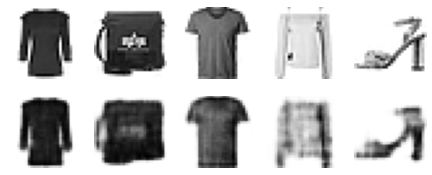

In [ ]:
show_reconstructions(conv_ae)
plt.show()